In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("/Users/lilitharutyunyan/Documents/GitHub/Compas-recidivism-analysis/data-cleaned/compas-scores-two-years-clean.csv", parse_dates=["c_jail_in", "c_jail_out"])
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,score_text,v_type_of_assessment,v_decile_score,v_score_text,in_custody,out_custody,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,Risk of Violence,1,Low,2014-07-07,2014-07-14,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,Risk of Violence,1,Low,2013-01-26,2013-02-05,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Low,Risk of Violence,3,Low,2013-06-16,2013-06-16,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,High,Risk of Violence,6,Medium,NaN,NaN,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,Risk of Violence,1,Low,NaN,NaN,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211,10995,raheem smith,raheem,smith,2013-10-20,Male,1995-06-28,20,Less than 25,African-American,...,High,Risk of Violence,9,High,2014-04-07,2014-04-27,0,169,0,0
6212,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,Medium,Risk of Violence,5,Medium,2013-11-22,2013-11-24,1,860,0,0
6213,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,Low,Risk of Violence,5,Medium,2014-01-31,2014-02-02,1,790,0,0
6214,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,Low,Risk of Violence,1,Low,2014-01-13,2014-01-14,0,808,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6216 entries, 0 to 6215
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       6216 non-null   int64         
 1   name                     6216 non-null   object        
 2   first                    6216 non-null   object        
 3   last                     6216 non-null   object        
 4   compas_screening_date    6216 non-null   object        
 5   sex                      6216 non-null   object        
 6   dob                      6216 non-null   object        
 7   age                      6216 non-null   int64         
 8   age_cat                  6216 non-null   object        
 9   race                     6216 non-null   object        
 10  juv_fel_count            6216 non-null   int64         
 11  decile_score             6216 non-null   int64         
 12  juv_misd_count           6216 non-

In [5]:
df1 = df[["age", "age_cat", "sex", "race",  #demographics
               "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", #criminal history
               "c_charge_degree", #current charges 
               "two_year_recid", "decile_score"]]



In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6216 entries, 0 to 6215
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              6216 non-null   int64 
 1   age_cat          6216 non-null   object
 2   sex              6216 non-null   object
 3   race             6216 non-null   object
 4   juv_fel_count    6216 non-null   int64 
 5   juv_misd_count   6216 non-null   int64 
 6   juv_other_count  6216 non-null   int64 
 7   priors_count     6216 non-null   int64 
 8   c_charge_degree  6216 non-null   object
 9   two_year_recid   6216 non-null   int64 
 10  decile_score     6216 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 534.3+ KB


In [7]:
df1.head()

,age,age_cat,sex,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid,decile_score
0,69,Greater than 45,Male,Other,0,0,0,0,F,0,1
1,34,25 - 45,Male,African-American,0,0,0,0,F,1,3
2,24,Less than 25,Male,African-American,0,0,1,4,F,1,4
3,23,Less than 25,Male,African-American,0,1,0,1,F,0,8
4,43,25 - 45,Male,Other,0,0,0,2,F,0,1


In [8]:
df_new = pd.get_dummies(df1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6216 entries, 0 to 6215
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      6216 non-null   int64
 1   juv_fel_count            6216 non-null   int64
 2   juv_misd_count           6216 non-null   int64
 3   juv_other_count          6216 non-null   int64
 4   priors_count             6216 non-null   int64
 5   two_year_recid           6216 non-null   int64
 6   decile_score             6216 non-null   int64
 7   age_cat_25 - 45          6216 non-null   uint8
 8   age_cat_Greater than 45  6216 non-null   uint8
 9   age_cat_Less than 25     6216 non-null   uint8
 10  sex_Female               6216 non-null   uint8
 11  sex_Male                 6216 non-null   uint8
 12  race_African-American    6216 non-null   uint8
 13  race_Asian               6216 non-null   uint8
 14  race_Caucasian           6216 non-null   uint8
 15  race

In [76]:
df_new = df_new.rename(columns={'race_African-American': 'race_African_American', 'race_Native American  ': 'race_Native_American', 'age_cat_25 - 45' : 'age_cat_25_45', 'age_cat_Greater than 45' : 'age_cat_Greater_than_45' 
                                }) 

In [51]:
x = df_new[["age", "sex_Female", "race_Caucasian","race_African-American",  #demographics
               "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", #criminal history
               "c_charge_degree_F", #current charges 
               "two_year_recid"]]

y = df_new.decile_score

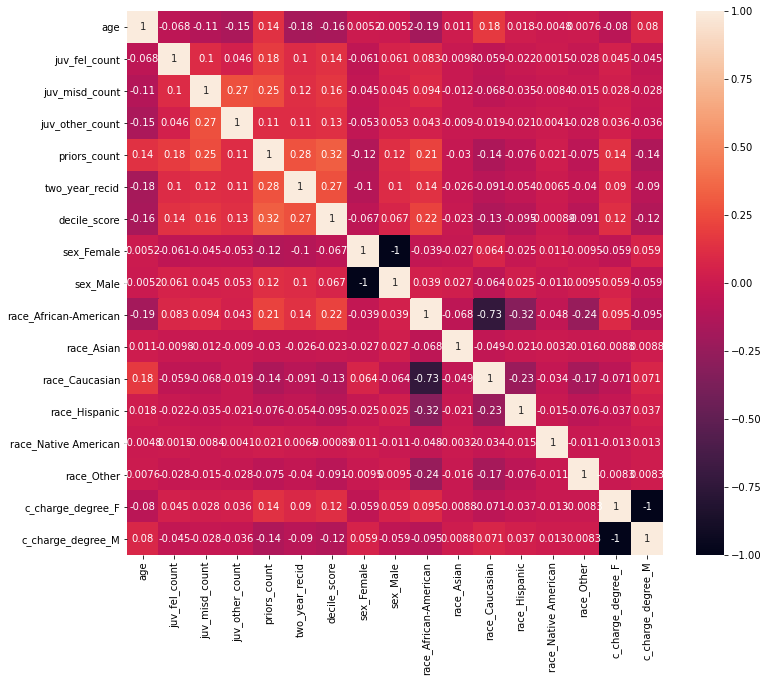

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(df_new.corr(), annot=True);

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [57]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)
y_pred = linearreg.predict(X_test)
print(y_pred)

[5.37298626 3.1046032  5.66915026 ... 2.06624661 3.45036218 4.02162874]


In [55]:
r2_score(y_test, y_pred)

0.452877841387759

In [56]:
mean_squared_error(y_test, y_pred)

4.323029388735869

(array([ 35., 163., 395., 640., 504., 218.,  56.,  28.,   9.,   4.]),
 array([-0.84275   ,  0.55251394,  1.94777788,  3.34304182,  4.73830576,
         6.1335697 ,  7.52883364,  8.92409758, 10.31936152, 11.71462546,
        13.1098894 ]),
 <BarContainer object of 10 artists>)

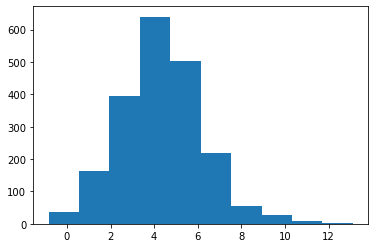

In [59]:
plt.hist(y_pred)


In [60]:
# The R_squared is very low, we have to come up with new model.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='decile_score', ylabel='Density'>

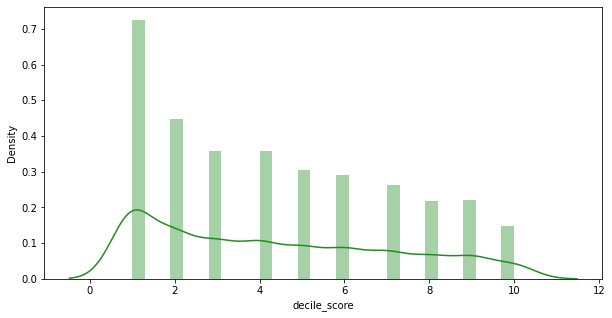

In [61]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(df_new.decile_score, bins=30, kde=True, ax=ax, color='forestgreen')



# From the graph above, we can see that our y variable is not normally distributed, and has long right tail; i.e it is right skewed. Hence, we will take the log of it.

In [63]:
df_new['decile_score'] = np.log(df_new.decile_score)
df_new.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,decile_score,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,c_charge_degree_F,c_charge_degree_M
0,69,0,0,0,0,0,-inf,0,1,0,0,0,0,0,1,1,0
1,34,0,0,0,0,1,0.094048,0,1,1,0,0,0,0,0,1,0
2,24,0,0,1,4,1,0.326634,0,1,1,0,0,0,0,0,1,0
3,23,0,1,0,1,0,0.732099,0,1,1,0,0,0,0,0,1,0
4,43,0,0,0,2,0,-inf,0,1,0,0,0,0,0,1,1,0


In [66]:
linearreg_1 = LinearRegression()
linearreg_1.fit(X_train,y_train)
y_pred_1 = linearreg_1.predict(X_test)
print(y_pred_1)

[5.37298626 3.1046032  5.66915026 ... 2.06624661 3.45036218 4.02162874]


In [67]:
r2_score(y_test, y_pred_1)

0.452877841387759

In [68]:
#Still the same

In [ ]:
x = df_new[["age", "sex_Female", "race_Caucasian","race_African-American",  #demographics
               "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", #criminal history
               "c_charge_degree_F", #current charges 
               "two_year_recid"]]

y = df_new.decile_score


